<a href="https://colab.research.google.com/github/smilingashutosh/qpp-eval-new/blob/main/duot5/matrix_prob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
# library
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [158]:
#Files for sparse retrieval model(bm25 + monoT5) 

res_file = 'https://raw.githubusercontent.com/smilingashutosh/qpp-eval-new/main/res_files/02bm25.1000.mt5.50/res.bm25.1000.monot5.50.mmnorm'
pairwise_file = 'https://raw.githubusercontent.com/smilingashutosh/qpp-eval-new/main/res_files/02bm25.1000.mt5.50/duoT5.50.score.softmax.pairwise.doc.tsv'
querywise_performance = 'https://raw.githubusercontent.com/smilingashutosh/qpp-eval-new/main/duot5/monot5__trecDL_performance.csv'
query_index = 1  # Good cases : qid_np[1],qid_np[2],qid_np[3]   Bad cases:qid_np[92] , qid_np[94] ,qid_np[94] 

## files for BM25 model  

# res_file = 'https://raw.githubusercontent.com/smilingashutosh/qpp-eval-new/main/msmarco_runs/11bm25.50/res.bm25.50.mmnorm'
# pairwise_file = 'https://raw.githubusercontent.com/smilingashutosh/qpp-eval-new/main/msmarco_runs/11bm25.50/duoT5.50.score.softmax.pairwise.doc.tsv'
# querywise_performance = 'https://raw.githubusercontent.com/smilingashutosh/qpp-eval-new/main/duot5/bm25__trecDL_performance.csv'
# query_index = 1  # Good cases : qid_np[1],qid_np[2],qid_np[3]   Bad cases:qid_np[92] , qid_np[94] ,qid_np[94] 

## files for Dense index model (Colbert e2e) 

# res_file = 'https://raw.githubusercontent.com/smilingashutosh/qpp-eval-new/main/msmarco_runs/07ColBERT.E2E/E2E.res.50.mmnorm'
# pairwise_file = 'https://raw.githubusercontent.com/smilingashutosh/qpp-eval-new/main/msmarco_runs/07ColBERT.E2E/duoT5.50.score.softmax.pairwise.doc.tsv'
# querywise_performance = 'https://raw.githubusercontent.com/smilingashutosh/qpp-eval-new/main/duot5/colbert_e2e_trecDL_performance.csv'
# query_index = 1  # Good cases : qid_np[1],qid_np[2],qid_np[3]   Bad cases:qid_np[92] , qid_np[94] ,qid_np[94] 

## Examine query-wise performance for good and bad cases


In [159]:
cols=['qid','AP','nDCG','PRC-QPP']
qid_df= pd.read_csv(querywise_performance,names=cols,sep=',')
qid_df = qid_df.sort_values(by='AP',ascending=False).reset_index(drop=True)

print(qid_df.head(5))
print(qid_df.tail(5))

       qid      AP    nDCG   PRC-QPP
0   855410  1.0000  1.0000  1.784100
1   324585  0.9751  0.9936  2.166629
2  1105792  0.8797  0.8832  1.790984
3  1127540  0.8762  0.9275  2.241000
4   962179  0.8082  0.9250  1.864283
        qid      AP    nDCG   PRC-QPP
92   489204  0.0596  0.1550  1.214261
93   118440  0.0172  0.1081  1.954216
94  1063750  0.0143  0.0632  1.487847
95   443396  0.0142  0.1096  1.712041
96   405163  0.0017  0.0298  1.558940


###Finding unique query ids and selecting one

In [160]:
qid_np = qid_df['qid'].unique()
qid_np[query_index]

324585

## Importing the  Res file

In [161]:
columns=['qid','Q0','docid','rank','score','comment']
res_df=pd.read_csv(res_file,names=columns,sep='\t')
res_df.head(5)

,qid,Q0,docid,rank,score,comment
0,19335,Q0,8412682,0,1.000000,pyterrier
1,19335,Q0,3045567,1,0.988172,pyterrier
2,19335,Q0,8412683,2,0.978426,pyterrier
3,19335,Q0,6452949,3,0.976848,pyterrier
4,19335,Q0,342431,4,0.960322,pyterrier


### Selecting the res file for a particular case (Query-id)

In [162]:
res_df_qid = res_df[res_df['qid'] == qid_np[query_index]].sort_values(by='rank',ascending=True)  #change the query id here
res_df_qid = res_df_qid.reset_index(drop=True)
res_df_qid.head(2)

,qid,Q0,docid,rank,score,comment
0,324585,Q0,8290314,0,1.000000,pyterrier
1,324585,Q0,405281,1,0.999842,pyterrier


## Importing the pairwise probability between Doc_i and Doc_J

In [163]:
paircols = ['qid','docpair','prob','comment']
pairwise_df=pd.read_csv(pairwise_file,names=paircols,sep='\t')
pairwise_df.head(5)

,qid,docpair,prob,comment
0,1030303,8726436_8726433,0.892408,softmax
1,1030303,8726436_8726435,0.480476,softmax
2,1030303,8726436_8726429,0.955404,softmax
3,1030303,8726436_8726437,0.555172,softmax
4,1030303,8726436_7156982,0.868546,softmax


In [164]:
pairwise_df_qid = pairwise_df[pairwise_df['qid'] == qid_np[query_index]] #change the query id here
pairwise_df_lim= pairwise_df_qid[['docpair','prob']]
docpair_np = np.array(pairwise_df_lim['docpair'])
prob_np = np.array(pairwise_df_lim['prob'])

dict_docpair_prob = dict(zip(docpair_np,prob_np))
print(len(dict_docpair_prob))
print(docpair_np[:2])
print(type(prob_np[:2]))

2450
['7941125_6480421' '7941125_405282']
<class 'numpy.ndarray'>


In [165]:
docs_order_np = np.array(res_df_qid['docid'])
docs_order_np
doc_pair_array = np.zeros(shape=(50,50))
for i in range(50):
  for j in range(50):
    if (i !=j):
      doc_pair_temp = str(docs_order_np[i]) +"_"+ str(docs_order_np[j])
      index_temp = np.where(docpair_np == doc_pair_temp)    
      prob_Pij_temp = prob_np[index_temp]
      doc_pair_array[i,j] = prob_Pij_temp 


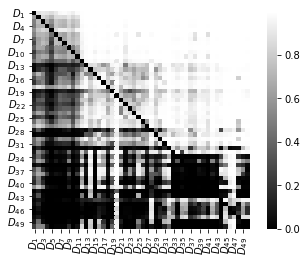

In [166]:
matrix2= doc_pair_array
df = pd.DataFrame(matrix2,
                  columns=["$D_1$","$D_2$","$D_3$","$D_4$","$D_5$","$D_6$","$D_7$","$D_8$","$D_9$","$D_{10}$","$D_{11}$","$D_{12}$","$D_{13}$","$D_{14}$","$D_{15}$","$D_{16}$","$D_{17}$","$D_{18}$","$D_{19}$","$D_{20}$","$D_{21}$","$D_{22}$","$D_{23}$","$D_{24}$","$D_{25}$","$D_{26}$","$D_{27}$","$D_{28}$","$D_{29}$","$D_{30}$","$D_{31}$","$D_{32}$","$D_{33}$","$D_{34}$","$D_{35}$","$D_{36}$","$D_{37}$","$D_{38}$","$D_{39}$","$D_{40}$","$D_{41}$","$D_{42}$","$D_{43}$","$D_{44}$","$D_{45}$","$D_{46}$","$D_{47}$","$D_{48}$","$D_{49}$","$D_{50}$"],
                  index=["$D_1$","$D_2$","$D_3$","$D_4$","$D_5$","$D_6$","$D_7$","$D_8$","$D_9$","$D_{10}$","$D_{11}$","$D_{12}$","$D_{13}$","$D_{14}$","$D_{15}$","$D_{16}$","$D_{17}$","$D_{18}$","$D_{19}$","$D_{20}$","$D_{21}$","$D_{22}$","$D_{23}$","$D_{24}$","$D_{25}$","$D_{26}$","$D_{27}$","$D_{28}$","$D_{29}$","$D_{30}$","$D_{31}$","$D_{32}$","$D_{33}$","$D_{34}$","$D_{35}$","$D_{36}$","$D_{37}$","$D_{38}$","$D_{39}$","$D_{40}$","$D_{41}$","$D_{42}$","$D_{43}$","$D_{44}$","$D_{45}$","$D_{46}$","$D_{47}$","$D_{48}$","$D_{49}$","$D_{50}$"])

# Draw the heatmap with the mask
sns.heatmap(df, mask=None, square=True, cmap="gray")
plt.yticks(rotation=0) 
plt.savefig('heatmap2.pdf')
